# Machine Learning Case Study On Credit Card Fraud Detection Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:\\ITVedanta\\Machine Learning\\Project ML\\creditcard.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- There are 284807 rows and 31 columns.
- All columns are having numeric datatypes.

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- This Dataset is of classification type. As output variable is discrete value. 
- Here, the column Class is Output variable/Label column. 
    - 1-Fraudulent record
    - 0-Legit record

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- All columns are of numeric datatype and No null values in entire dataset.

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

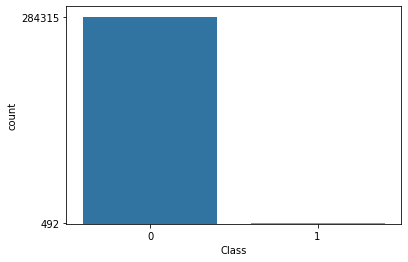

In [8]:
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

- Dataset is heavily imbalanced.
- Legit transactions have 284315 records where Fraudulent transactions have only 492 records.
- We know that Data should be atleast 50-50 % distributed when we are predicting between yes and no.
- Need to remove imbalance by sampling.

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
#separate input and output variable:
X=df.drop("Class",axis=1) #input variable
Y=df["Class"] #Target variable

In [12]:
# spliting dataset 70% - 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
# Function to create model
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix :")
    #Confusion matrix
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
ros = RandomOverSampler() 

In [20]:
# before apply randomoversampler
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [21]:
# apply randomundersampling for balance
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [22]:
# after apply randomoversampler
pd.Series(Y_train1).value_counts()

1    199007
0    199007
Name: Class, dtype: int64

In [23]:
#before apply randomoversampler ,check Y_test
pd.Series(Y_test).value_counts() #check if not balance

0    85308
1      135
Name: Class, dtype: int64

In [24]:
#apply randomoversampling for balance
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [25]:
#after apply randomoversampler
pd.Series(Y_test1).value_counts()

1    85308
0    85308
Name: Class, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier 

In [30]:
ada=AdaBoostClassifier(n_estimators=10)

In [31]:
#call function
model=create_model(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

Confusion Matrix :
[[81925  3383]
 [ 8307 77001]]


# Conclusion:
- **Dataset:** 
    - Is of classification type and was not having null values.
    - All columns are already having numeric datatypes.
    - It was highly imbalanced. So applied over sampled technique to balance data.
- In analysis of credit card fraud detection, we will be focusing on recall score as False negative values are need to be reduced.
- **ML algorithms:**
    - Applied Logistic regression algorithm, SVM, Decision tree classification algorithms, checked if the model is overfit by pruning techniques, but observed that model was not overfit. algorithms. 
    - After that, carried out almost all feature selection techniques and ensembling techniques.
    - **Observed Best recall and f1 score in ADA Boost model. Got 98% accuracy in predicting legit transactions and 89% accuracy in predicting fradulent cases in recall scores. 94 % f1 score for legit and 93% f1 score for fradulent, which is excellent accuracy. Hence, considering ADA boost model for final deployment.**
    - Followed by ADA Boost, Gradient boost, Extreme gradient boost, Random Forest Tree and Bootstrapping has also given good scores.